**LAYER NORMALIZATION**

 To normalize the activations of a layer across the feature dimension. It helps stabilize training, improve convergence, and reduce internal covariate shift.

    [ Start ]  
       ↓  
   [ Input Data (X) ]  
       ↓  
   [ Compute Mean (μ) ]  
       ↓  
   [ Compute Variance (σ²) ]  
       ↓  
   [ Normalize: (X - μ) / sqrt(σ² + ε) ]  
       ↓  
   [ Scale & Shift: Y = γ * Normalized(X) + β ]  
       ↓  
   [ Output Normalized Values (Y) ]  
       ↓  
   [ End ]  


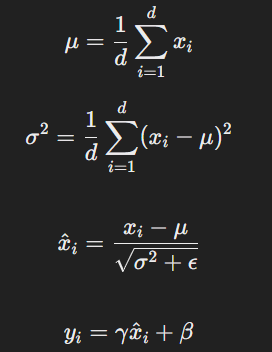

In [1]:
#simple implementation of layer normalization in a small data
import torch

# Step 1: Input tensor (single sample with 3 features)
X = torch.tensor([5.0, 10.0, 15.0])

# Step 2: Compute mean
mu = X.mean()

# Step 3: Compute variance
sigma_squared = X.var(unbiased=False)  # `unbiased=False` for population variance

# Step 4: Normalize
epsilon = 1e-5  # Small constant to prevent division by zero
X_norm = (X - mu) / torch.sqrt(sigma_squared + epsilon)

# Step 5: Apply learnable parameters (gamma and beta)
gamma = torch.tensor(2.0)  # Scaling factor
beta = torch.tensor(3.0)   # Shifting factor
Y = gamma * X_norm + beta

# Print results
print("Input X:", X)
print("Mean (μ):", mu.item())
print("Variance (σ²):", sigma_squared.item())
print("Normalized X:", X_norm)
print("Final Output Y after LayerNorm:", Y)


Input X: tensor([ 5., 10., 15.])
Mean (μ): 10.0
Variance (σ²): 16.66666603088379
Normalized X: tensor([-1.2247,  0.0000,  1.2247])
Final Output Y after LayerNorm: tensor([0.5505, 3.0000, 5.4495])


Final code for layer normalization


In [3]:
import torch
import torch.nn as nn


In [4]:
# Creating Layer Normalization
class LayerNormalization(nn.Module):

    def __init__(self, eps: float = 10**-6) -> None: # We define epsilon as 0.000001 to avoid division by zero
        super().__init__()
        self.eps = eps

        # We define alpha as a trainable parameter and initialize it with ones
        self.alpha = nn.Parameter(torch.ones(1)) # One-dimensional tensor that will be used to scale the input data

        # We define bias as a trainable parameter and initialize it with zeros
        self.bias = nn.Parameter(torch.zeros(1)) # One-dimensional tenso that will be added to the input data

    def forward(self, x):
        mean = x.mean(dim = -1, keepdim = True) # Computing the mean of the input data. Keeping the number of dimensions unchanged
        std = x.std(dim = -1, keepdim = True) # Computing the standard deviation of the input data. Keeping the number of dimensions unchanged

        # Returning the normalized input
        return self.alpha * (x-mean) / (std + self.eps) + self.bias